# Electrical Fault Detection 
We simulate the circuit under normal conditions as well as under various fault conditions. We then collect and save the measured Line Voltages and Line Currents at the output side of the power system. The faults on electrical power system transmission lines are supposed to be first detected and classified correctly and should be cleared in the least possible time.
* [0 0 0 0] - No Fault
* [1 0 0 1] - LG fault (Between Phase A and Ground)
* [0 0 1 1] - LL fault (Between Phase A and Phase B)
* [1 0 1 1] - LLG Fault (Between Phases A,B and ground)
* [0 1 1 1] - LLL Fault(Between all three phases)
* [1 1 1 1] - LLLG fault( Three phase symmetrical fault)


## Importing Libraries and Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_34952\1790553364.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# importing classifying data into dataframe
data = pd.read_csv('classData.csv')
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [4]:
# checking for null values in the data 
data.isnull().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
G,7861.0,0.432006,0.495387,0.000000,0.000000,0.000000,1.000000,1.000000
C,7861.0,0.411271,0.492095,0.000000,0.000000,0.000000,1.000000,1.000000
B,7861.0,0.555527,0.496939,0.000000,0.000000,1.000000,1.000000,1.000000
A,7861.0,0.571429,0.494903,0.000000,0.000000,1.000000,1.000000,1.000000
Ia,7861.0,13.721194,464.741671,-883.542316,-119.802518,2.042805,227.246377,885.738571
Ib,7861.0,-44.845268,439.269195,-900.526951,-271.845947,5.513317,91.194282,889.868884
Ic,7861.0,34.392394,371.107412,-883.357762,-61.034219,-4.326711,49.115141,901.274261
Va,7861.0,-0.007667,0.289150,-0.620748,-0.130287,-0.005290,0.111627,0.595342
Vb,7861.0,0.001152,0.313437,-0.608016,-0.159507,0.001620,0.153507,0.627875
Vc,7861.0,0.006515,0.307897,-0.612709,-0.215977,0.009281,0.239973,0.600179


* Distribution of Volatages and Currents


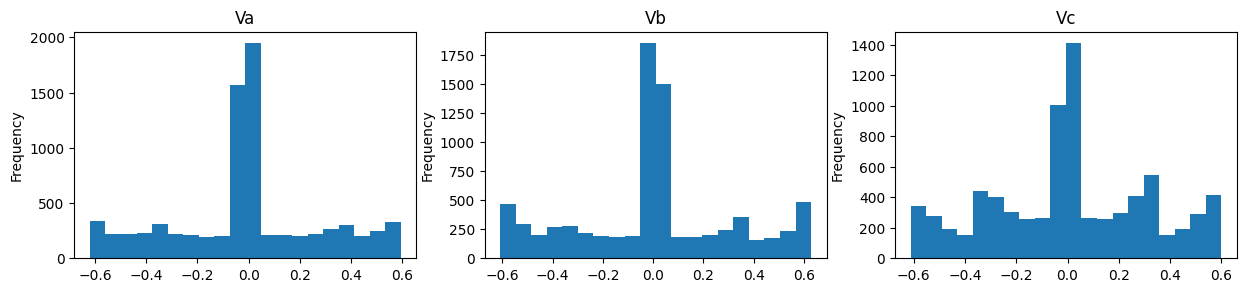

In [6]:
# ploting histograms to see distribution of voltages by phase
voltages = ['Va', 'Vb', 'Vc']

plt.figure(figsize=(15,10))

for n,v in enumerate(voltages):
    plt.subplot(3, 3, n+1)
    data[v].plot(kind='hist', bins =20)
    plt.title(v)
    

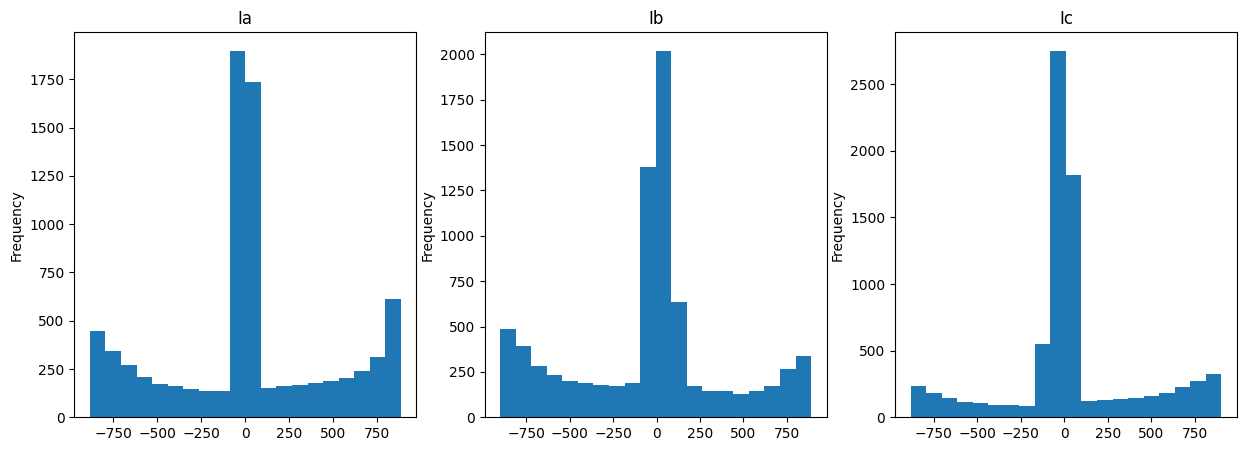

In [7]:
# ploting histograms to see distribution of currents by phase
currents = ['Ia', 'Ib', 'Ic']

plt.figure(figsize=(15,5))

for n,i in enumerate(currents):
    plt.subplot(1, 3, n+1)
    data[i].plot(kind='hist', bins=20)
    plt.title(i)

* Centrality Measures of Voltages and Currents

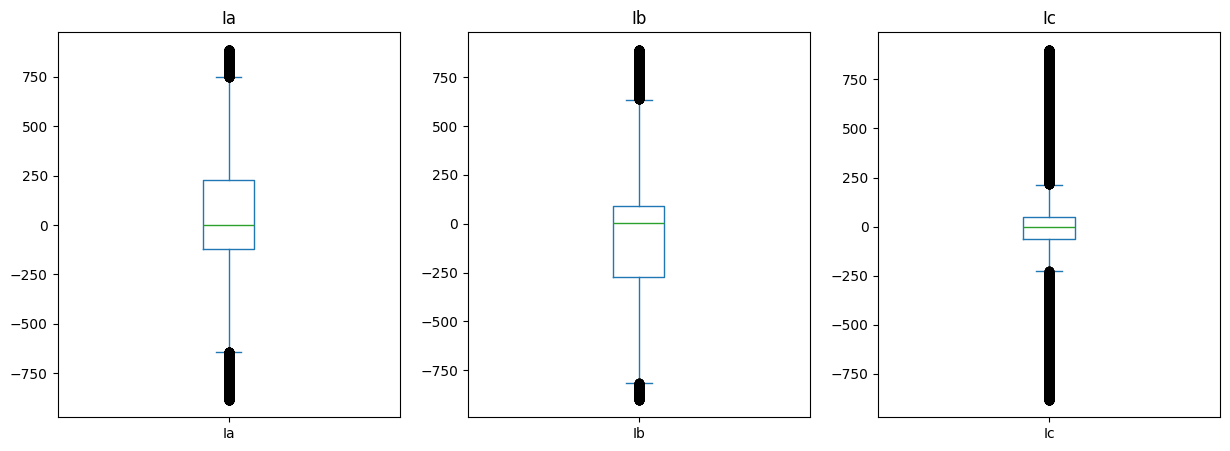

In [8]:
# Checking for outliers
currents = ['Ia', 'Ib', 'Ic']

plt.figure(figsize=(15, 5))


for n,i in enumerate(currents):
    plt.subplot(1, 3, n+1)
    data[i].plot(kind='box')
    plt.title(i)

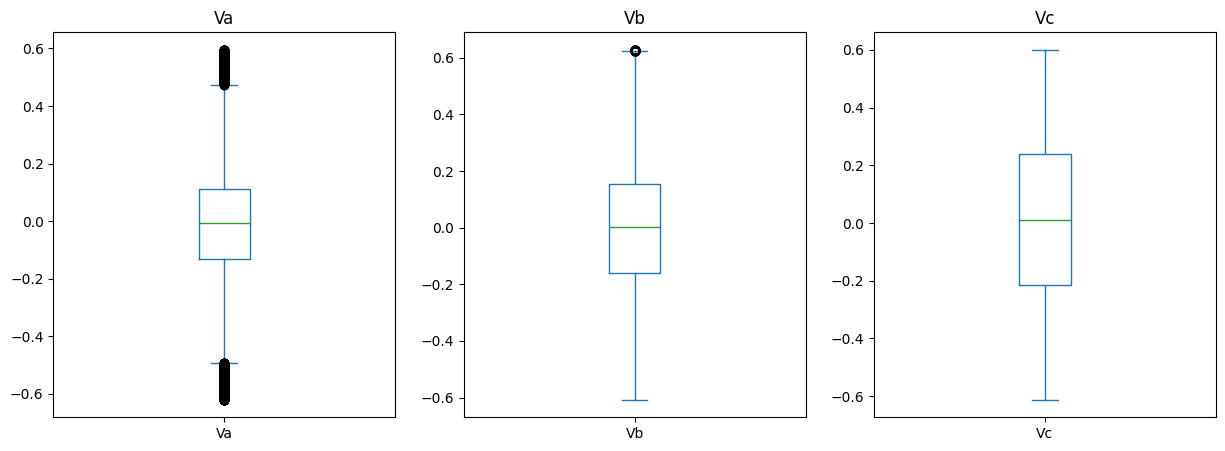

In [9]:
voltages = ['Va', 'Vb', 'Vc']
plt.figure(figsize=(15, 5))


for n,v in enumerate(voltages):
    plt.subplot(1, 3, n+1)
    data[v].plot(kind='box')
    plt.title(v)

In [10]:
# create a Fault Type column
data['Fault Type'] = data['G'].astype('str') + data['C'].astype('str') + data['B'].astype('str') + data['A'].astype('str')
data.head() 

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [11]:
# assigning fault names
data['Fault Type'][data['Fault Type'] == '0000' ] = 'NO Fault'
data['Fault Type'][data['Fault Type'] == '1001' ] = 'Line A to Ground Fault'
data['Fault Type'][data['Fault Type'] == '0110' ] = 'Line B to Line C Fault'
data['Fault Type'][data['Fault Type'] == '1011' ] = 'Line A Line B to Ground Fault'
data['Fault Type'][data['Fault Type'] == '0111' ] = 'Line A Line B Line C'
data['Fault Type'][data['Fault Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

C:\Users\hp\AppData\Local\Temp\ipykernel_34952\1729041114.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Fault Type'][data['Fault Type'] == '0000' ] = 'NO Fault'
C:\Users\hp\AppData\Local\Temp\ipykernel_34952\1729041114.py:2: Sett

In [12]:
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


Text(0.5, 1.0, 'Fault Type Count')

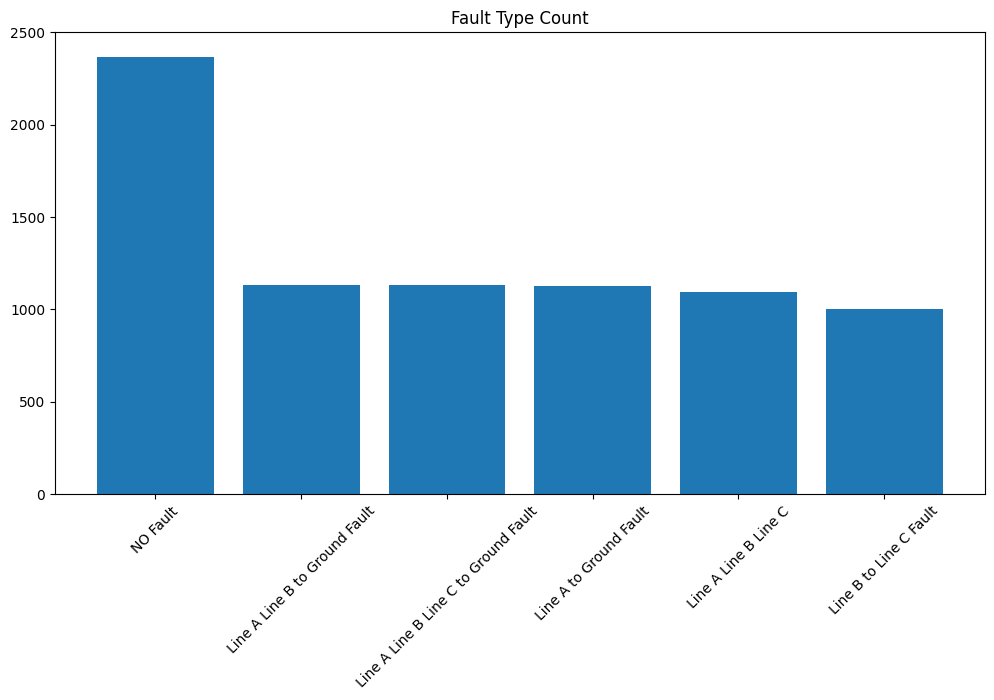

In [13]:
# count of each fault category to identify potential class imbalances.
# sns.barplot(data['Fault Type'])

plt.figure(figsize=(12, 6))
ax =plt.bar(x=data['Fault Type'].value_counts().index, height=data['Fault Type'].value_counts())
plt.xticks(rotation=45)
plt.ylim(top=2500)
plt.title('Fault Type Count')


### Visualizing the voltage readings

Text(0.5, 1.0, 'Voltage Readings')

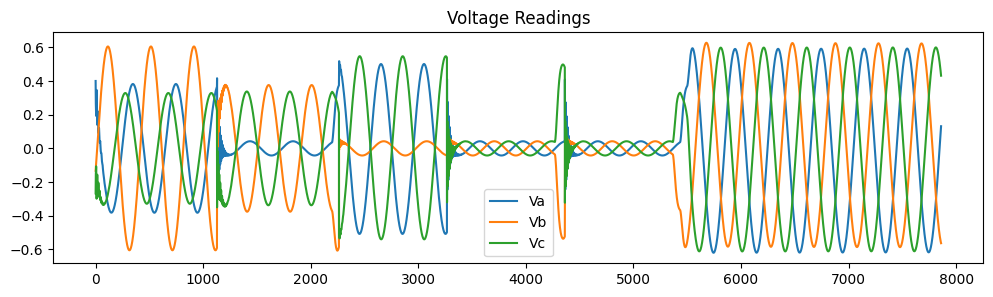

In [14]:
plt.figure(figsize=(12,3))
data['Va'].plot()
data['Vb'].plot()
data['Vc'].plot()
plt.legend()
plt.title('Voltage Readings')

<Figure size 1200x300 with 0 Axes>

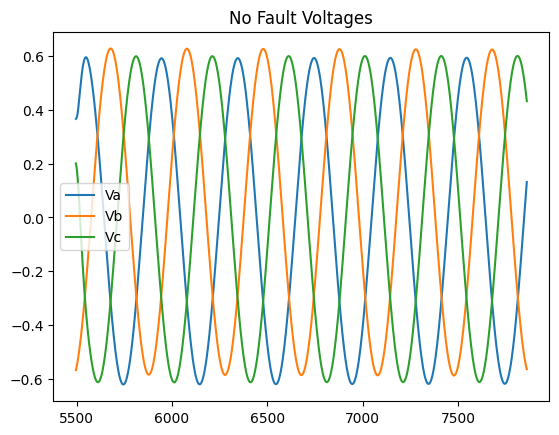

<Figure size 1200x300 with 0 Axes>

In [15]:
df_nf = data[data['Fault Type']== 'NO Fault']
df_nf[['Va', 'Vb', 'Vc']].plot()
plt.title('No Fault Voltages')
plt.figure(figsize=(12,3))

### Line to Ground fault

Text(0.5, 1.0, 'Line to Ground fault Voltages')

<Figure size 1200x300 with 0 Axes>

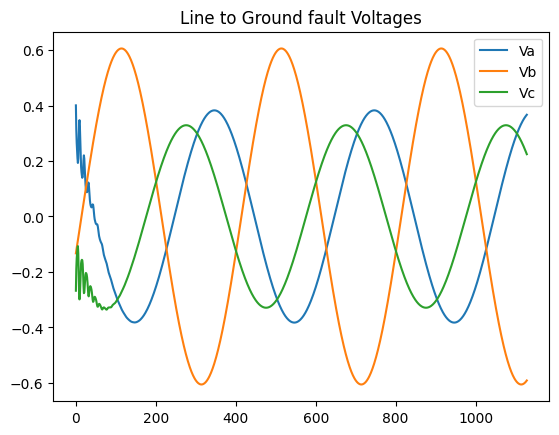

In [16]:
df_lg = data[data['Fault Type']== 'Line A to Ground Fault']
plt.figure(figsize=(12,3))
df_lg[['Va', 'Vb', 'Vc']].plot()
plt.title('Line to Ground fault Voltages')

### Line to Line Fault

Text(0.5, 1.0, 'Line to Line fault Voltages')

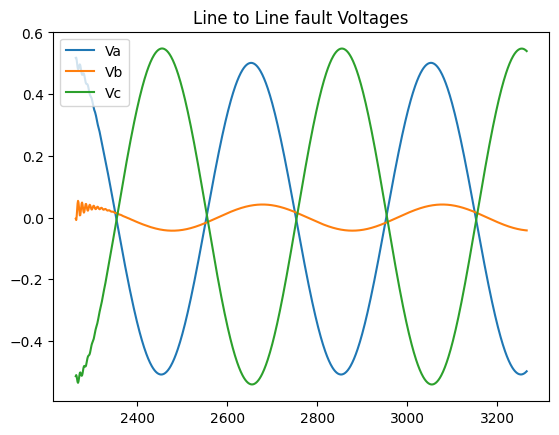

In [17]:
df_ll = data[data['Fault Type']== 'Line B to Line C Fault']
df_ll[['Va', 'Vb', 'Vc']].plot()
plt.title('Line to Line fault Voltages')

### Line to Line to Ground Fault

Text(0.5, 1.0, 'Line to Line to Ground fault Voltages')

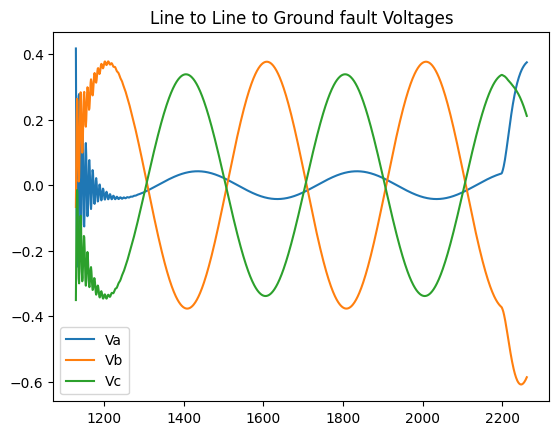

In [18]:

df_llg = data[data['Fault Type']== 'Line A Line B to Ground Fault']
df_llg[['Va', 'Vb', 'Vc']].plot()
plt.title('Line to Line to Ground fault Voltages')

### Line to Line to Line Fault

Text(0.5, 1.0, 'Line to Line to line Fault Voltages')

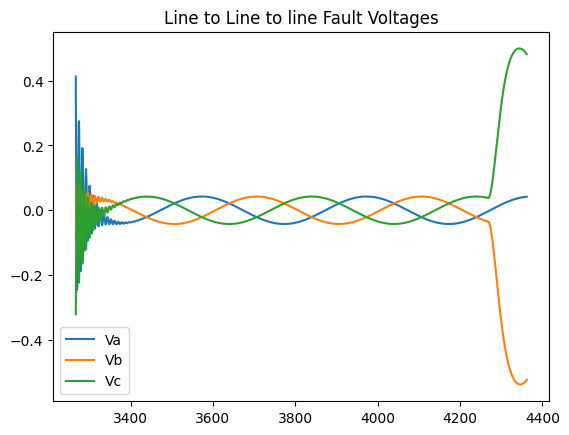

In [19]:
df_lll = data[data['Fault Type']== 'Line A Line B Line C']
df_lll[['Va', 'Vb', 'Vc']].plot()
plt.title('Line to Line to line Fault Voltages')

### Line to Line to Line to Ground Fault

Text(0.5, 1.0, 'Line to Line to line to Ground Fault Voltages')

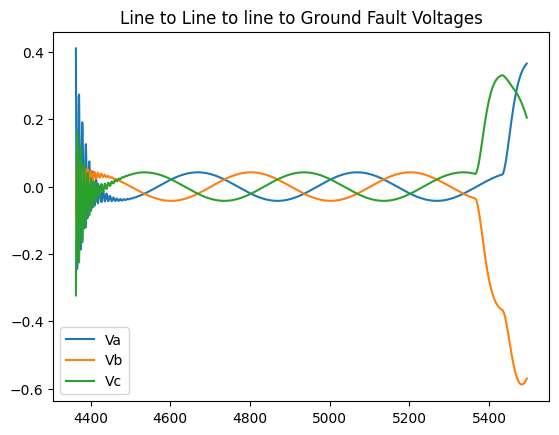

In [20]:
df_lllg = data[data['Fault Type']== 'Line A Line B Line C to Ground Fault']
df_lllg[['Va', 'Vb', 'Vc']].plot()
plt.title('Line to Line to line to Ground Fault Voltages')

In [21]:
df_lg.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


* there are voltage fluctuations when there is a fault
* the voltage is reduced when there is a fault

Text(0.5, 1.0, 'Current Readings')

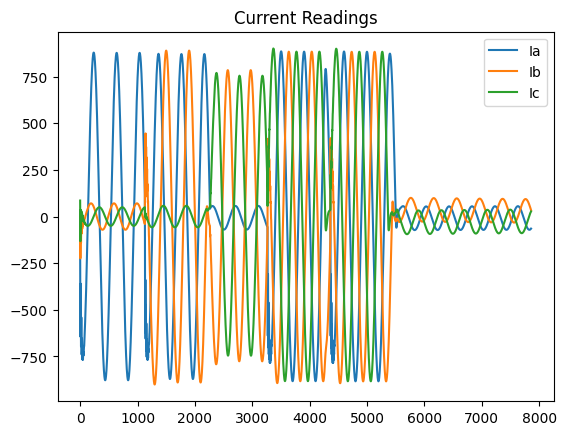

In [22]:
# checking current waveform during fault and no fault 
data[['Ia', 'Ib', 'Ic']].plot()
plt.title('Current Readings')

* when there is a fault the current increases drastically

## Modeling and Evaluation

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Fault Type'] = le.fit_transform(data['Fault Type'])
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [24]:
# Splitting the data
from sklearn.model_selection import train_test_split

X = data.drop('Fault Type', axis=1)
y = data['Fault Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)


In [25]:
# checking the sizes of the testing and training data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6288, 10)
(6288,)
(1573, 10)
(1573,)


### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lin_reg = LogisticRegression()
lin_reg.fit(X_train, y_train)

# Evaluating Performance
lin_score = lin_reg.score(X_test, y_test)
print(f'Accuracy Score: {round(lin_score*100, 2)} %')
print('....................................................')

y_pred = lin_reg.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy Score: 88.18 %
....................................................
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       235
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       221
           3       1.00      1.00      1.00       211
           4       1.00      0.11      0.21       209
           5       1.00      1.00      1.00       469

    accuracy                           0.88      1573
   macro avg       0.93      0.85      0.82      1573
weighted avg       0.93      0.88      0.85      1573



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


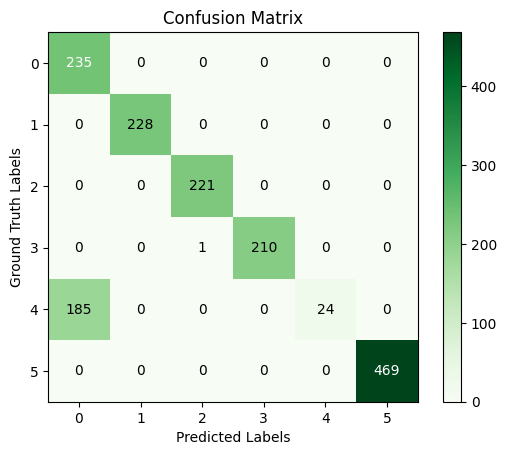

In [27]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Greens)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth Labels')

# Add colorbar
plt.colorbar()

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

# Display the plot
plt.show()

### XGBoost

In [28]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_score = xgb_clf.score(X_test, y_test)

# Evaluating Performance
print(f'Accuracy Score: {round(xgb_score*100, 2)} %')
print('....................................................')


xgb_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, xgb_pred))

Accuracy Score: 100.0 %
....................................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       221
           3       1.00      1.00      1.00       211
           4       1.00      1.00      1.00       209
           5       1.00      1.00      1.00       469

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



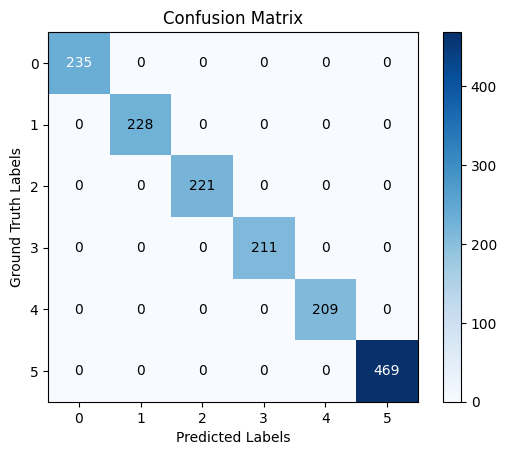

In [29]:
from sklearn.metrics import confusion_matrix

# Sample ground truth and predicted labels
ground_truth = np.array([0, 1, 0, 1, 1, 0, 0])
predicted_labels = np.array([0, 1, 0, 0, 1, 1, 0])

# Generate confusion matrix
cm1 = confusion_matrix(y_test, xgb_pred)

# Plot confusion matrix
plt.imshow(cm1, cmap=plt.cm.Blues)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth Labels')

# Add colorbar
plt.colorbar()

# Add text annotations
for i in range(cm1.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm1[i, j]), ha='center', va='center', color='white' if cm1[i, j] > cm1.max() / 2 else 'black')

# Display the plot
plt.show()

### SVC

In [30]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf')
svc_clf.fit(X_train, y_train)

svc_score = svc_clf.score(X_test, y_test)
svc_pred = svc_clf.predict(X_test)

print(f'Accuracy Score: {round(svc_score*100, 2)}%')
print('....................................................')
print(classification_report(y_test, svc_pred))

Accuracy Score: 74.0%
....................................................
              precision    recall  f1-score   support

           0       0.50      0.31      0.38       235
           1       0.43      0.37      0.40       228
           2       0.72      0.79      0.75       221
           3       0.77      0.85      0.81       211
           4       0.80      0.88      0.84       209
           5       0.89      1.00      0.94       469

    accuracy                           0.74      1573
   macro avg       0.69      0.70      0.69      1573
weighted avg       0.71      0.74      0.72      1573



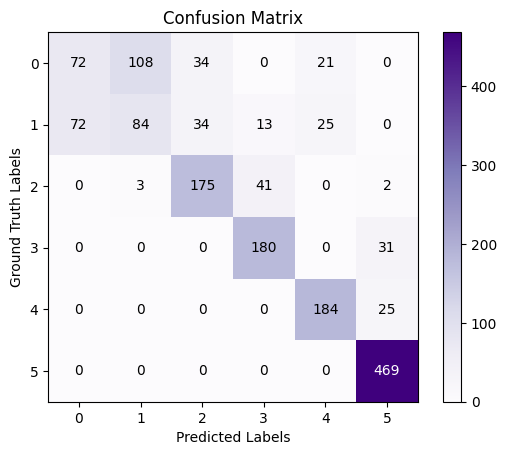

In [31]:
# Generate confusion matrix
cm2 = confusion_matrix(y_test, svc_pred)

# Plot confusion matrix
plt.imshow(cm2, cmap=plt.cm.Purples)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth Labels')

# Add colorbar
plt.colorbar()

# Add text annotations
for i in range(cm2.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm2[i, j]), ha='center', va='center', color='white' if cm2[i, j] > cm2.max() / 2 else 'black')

# Display the plot
plt.show()

## Conclusion
* Looking at the metrics for the different models the XGboost model works best with a 100% accuracy score. 
* The goal to make a model to identify types of faults using machine learning has been achieved